# Load Packages

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import sys
sys.path.append('../src')

In [ ]:
import nltk
nltk.download('stopwords')

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import umap

/Users/utkarshmaheshwari/opt/anaconda3/envs/nutrilens/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [4]:
from data_loading import *
from eda import *
from data_cleaning import *
from k_means import *

# Load Data

Define columns to load from the raw file

In [8]:
columns_to_keep = [
    # ===== IDENTIFIERS & METADATA =====
    'code',
    'product_name',
    'generic_name',
    'quantity',
    'brands',
    'brands_tags',
    'categories',
    'categories_tags',
    'countries_tags',
    
    # ===== TARGET =====
    'nova_group',
    
    # ===== INGREDIENTS (CRITICAL - your main signal) =====
    'ingredients_text',
    'ingredients_tags',
    'ingredients_analysis_tags',
    
    # ===== ADDITIVES (VERY IMPORTANT for NOVA) =====
    'additives_n',
    'additives',
    'additives_tags',
    'additives_en',
    
    # ===== ALLERGENS & TRACES (might indicate processing) =====
    'allergens',
    'allergens_en',
    'traces',
    'traces_tags',
    
    # ===== SERVING INFO =====
    'serving_size',
    'serving_quantity',
    'product_quantity',
    
    # ===== QUALITY FLAGS =====
    'no_nutrition_data',
    'data_quality_errors_tags',
    'completeness',
    
    # ===== NUTRITION SCORES =====
    'nutriscore_score',
    'nutriscore_grade',
    'nutrition-score-fr_100g',
    'pnns_groups_1',
    'pnns_groups_2',
    'main_category',
    'main_category_en',
    
    # ===== CORE MACRONUTRIENTS (definitely keep) =====
    'energy-kj_100g',
    'energy-kcal_100g',
    'energy_100g',
    'fat_100g',
    'saturated-fat_100g',
    'trans-fat_100g',
    'cholesterol_100g',
    'carbohydrates_100g',
    'sugars_100g',
    'added-sugars_100g',
    'fiber_100g',
    'proteins_100g',
    'salt_100g',
    'sodium_100g',
    
    # ===== FAT BREAKDOWN (ultra-processed often has specific fat profiles) =====
    'monounsaturated-fat_100g',
    'polyunsaturated-fat_100g',
    'omega-3-fat_100g',
    'omega-6-fat_100g',
    
    # ===== SUGAR TYPES (helps identify ultra-processed sweeteners) =====
    'sucrose_100g',
    'glucose_100g',
    'fructose_100g',
    'lactose_100g',
    'maltose_100g',
    'maltodextrins_100g',
    
    # ===== SUGAR ALCOHOLS (common in ultra-processed) =====
    'polyols_100g',
    'erythritol_100g',
    'maltitol_100g',
    'sorbitol_100g',
    
    # ===== FIBER TYPES =====
    'soluble-fiber_100g',
    'insoluble-fiber_100g',
    
    # ===== KEY MICRONUTRIENTS (some correlation with processing) =====
    'sodium_100g',  # duplicate but important
    'potassium_100g',
    'calcium_100g',
    'iron_100g',
    'vitamin-c_100g',
    
    # ===== FRUIT/VEG CONTENT (NOVA indicator) =====
    'fruits-vegetables-nuts_100g',
    'fruits-vegetables-nuts-estimate_100g',
    'fruits-vegetables-nuts-estimate-from-ingredients_100g',
    
    # ===== PROCESSING INDICATORS =====
    'alcohol_100g',
    'caffeine_100g',
    'cocoa_100g',
]



Define file path

In [9]:
path = "../data/us_nova_rows.csv"
path = "../data/analysis_data/only_english.csv"

In [10]:
data = pd.read_csv(path)
data.head()

/var/folders/7j/pj2q5pdx6g373n0pxkk0xd4r0000gn/T/ipykernel_79604/3175762166.py:1: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(path)


,code,product_name,categories_tags,ingredients_text,ingredient_count,additives_n,additive_density,nutriscore_score,monounsaturated-fat_100g,sugars_100g,polyunsaturated-fat_100g,sugar_fiber_ratio,carbohydrates_100g,fiber_100g,saturated-fat_100g,sodium_per_calorie,allergens_en,nova_group
0,28,Hershey’s Syrup,"en:beverages-and-beverages-preparations,en:bev...",organ defat hemp seed powder certifi organ qua...,1,0.0,0.000000,NaN,0.0,6.0,0.0,0.594059,15.00,10.000,0.0,NaN,NaN,1
1,116,Vanille-Erdbeer-Cocktail,NaN,sunflow seed butter roast sunflow kernel dri c...,30,4.0,0.129032,NaN,0.0,0.0,0.0,NaN,8.82,0.441,0.0,NaN,NaN,4
2,226,Naturelo,NaN,methylcellulos color preserv flavong ount per ...,5,1.0,0.166667,NaN,0.0,0.0,0.0,NaN,0.00,0.000,0.0,NaN,NaN,4
3,261,Prebiotic Fiber Gummies,"en:snacks,en:sweet-snacks,en:confectioneries,e...",chicori root fiber water pectin agar agar tapi...,11,6.0,0.500000,NaN,0.0,0.0,0.0,NaN,0.00,0.000,0.0,NaN,NaN,4
4,283,Irish Sea Moss,NaN,irish sea moss extract chondru crispu hypromel...,3,2.0,0.500000,NaN,0.0,0.0,0.0,NaN,0.00,0.000,0.0,NaN,NaN,4


# EDA

In [11]:
data["ingredients_text"].head()

0    Sojaproteinisolat, Weizen - protein, Kaffee-Ex...
1    Organic Defatted Hemp Seed Powder. Certified O...
2    Sugar Cane, Glucose Syrup (Corn Syrup), Water,...
3    wate NUTRITIONAL INFORMATION for 250 ml of pro...
4    Sunflower Seed Butter (Roasted Sunflower Kerne...
Name: ingredients_text, dtype: object

EDA

NOVA GROUP DISTRIBUTION
Null NOVA values: 0

NOVA Group Counts:
nova_group
1     16166
2      1735
3     40891
4    214017
Name: count, dtype: int64


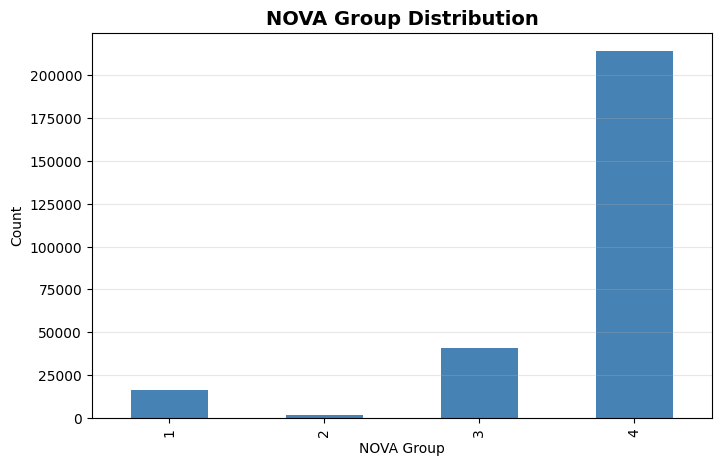

MISSING DATA ANALYSIS

Top 25 columns with missing data:
            column  missing_count  missing_pct
      allergens_en         272809   100.000000
 sugar_fiber_ratio          53500    19.610790
  nutriscore_score          52194    19.132067
   categories_tags          30005    10.998537
sodium_per_calorie          18878     6.919860
      product_name           1284     0.470659
              code              0     0.000000
  ingredients_text              0     0.000000
  ingredient_count              0     0.000000
       additives_n              0     0.000000
  additive_density              0     0.000000
        nova_group              0     0.000000


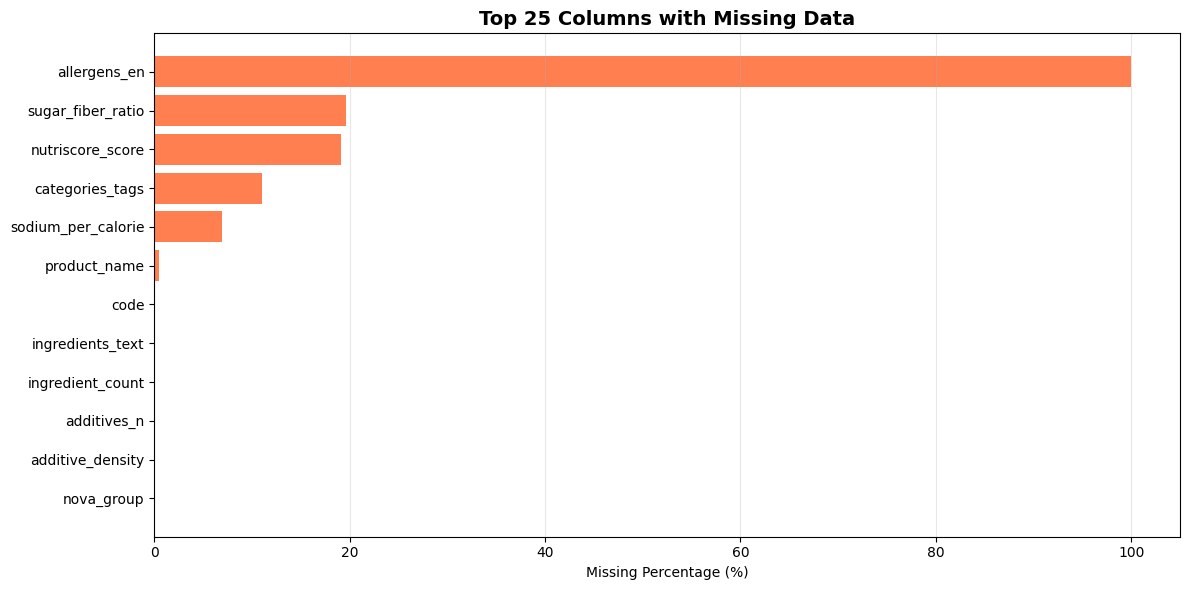

INGREDIENTS TEXT ANALYSIS
Missing ingredients_text: 0 (0.00%)

Ingredient text length stats:
count    272809.000000
mean        264.399591
std         226.782711
min           4.000000
25%         114.000000
50%         204.000000
75%         340.000000
max        4875.000000
Name: temp_ingredient_length, dtype: float64

Ingredient count stats:
count    272809.0
mean          1.0
std           0.0
min           1.0
25%           1.0
50%           1.0
75%           1.0
max           1.0
Name: temp_ingredient_count, dtype: float64

Approximate ingredient count by NOVA group:
               count  mean  std  min  25%  50%  75%  max
nova_group                                              
1            16166.0   1.0  0.0  1.0  1.0  1.0  1.0  1.0
2             1735.0   1.0  0.0  1.0  1.0  1.0  1.0  1.0
3            40891.0   1.0  0.0  1.0  1.0  1.0  1.0  1.0
4           214017.0   1.0  0.0  1.0  1.0  1.0  1.0  1.0


In [11]:
eda_results = run_eda_pipeline(data)

CORRELATION WITH NOVA GROUP
----------------------------------------------------------------------
Top 20 Correlations with NOVA group:
----------------------------------------------------------------------
                 feature  correlation  missing_pct
        nutriscore_score     0.371930    19.132067
             additives_n     0.358713     0.000000
        ingredient_count     0.352451     0.000000
             sugars_100g     0.106282     0.000000
      saturated-fat_100g     0.074589     0.000000
              fiber_100g    -0.053518     0.000000
      carbohydrates_100g     0.022915     0.000000
polyunsaturated-fat_100g    -0.009636     0.000000
monounsaturated-fat_100g    -0.007262     0.000000


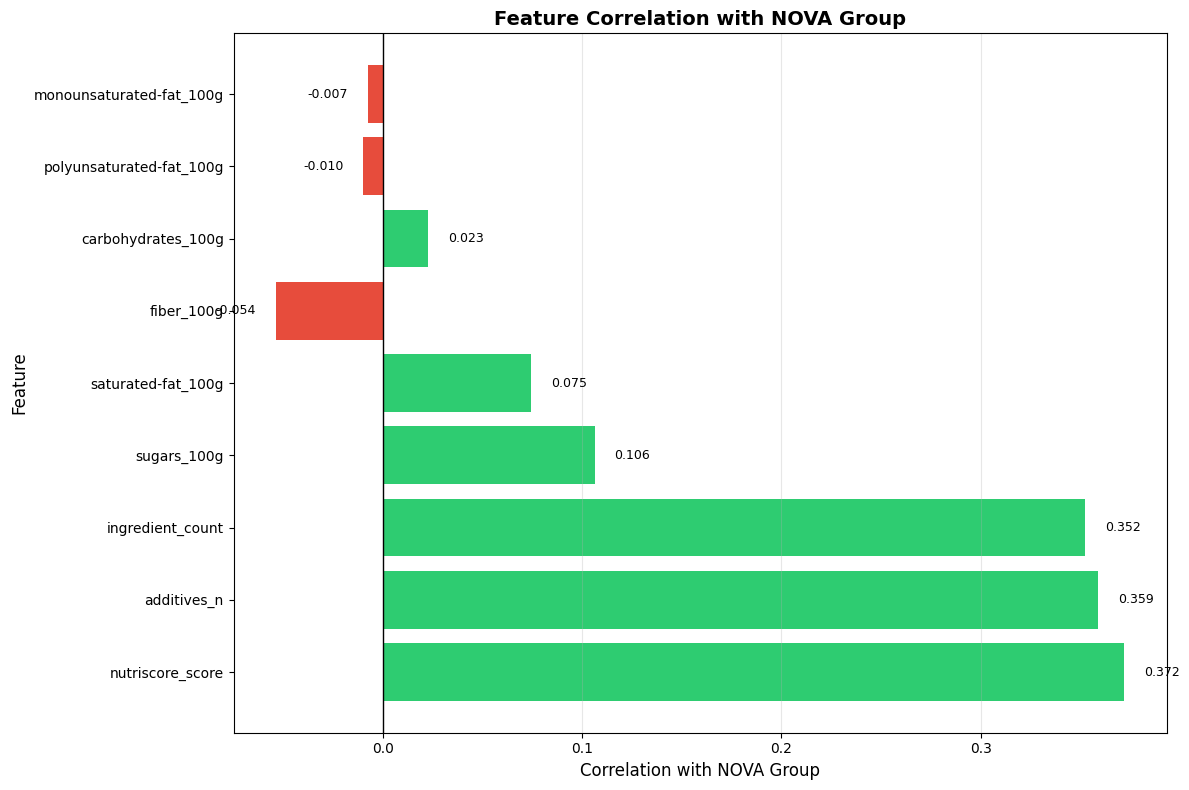

Summary
Total features analyzed: 9
Features with |correlation| > 0.1: 4
Features with |correlation| > 0.2: 3
Features with |correlation| > 0.3: 3

Strongest correlation: nutriscore_score (0.372)
Weakest correlation: monounsaturated-fat_100g (-0.007)
----------------------------------------------------------------------
List of features in descending order of correlation with NOVA group
0            nutriscore_score
1                 additives_n
2            ingredient_count
3                 sugars_100g
4          saturated-fat_100g
5                  fiber_100g
6          carbohydrates_100g
7    polyunsaturated-fat_100g
8    monounsaturated-fat_100g
Name: feature, dtype: object
----------------------------------------------------------------------


In [13]:
cor_df = correlation_with_nova(data)
cor_df.reset_index(inplace=True)

print("-"*70)
print("List of features in descending order of correlation with NOVA group")
print(cor_df["feature"])
print("-"*70)

# Observations:
# 1) Based on the correlations, some additional feature engineering to calculate ingredient count, additives_n (in scanned labels) along with some nutrition labels may be useful
# 2) Most of the 70+ columns currently in the "data" data frame have very low correlation with NOVA group and can be dropped to reduce dimensionality and noise in the model training process


# Data Cleaning & Feature Engineering

Clean data

In [ ]:
# define columns to keep for modeling

# features_to_keep = [] # define custom list of leverage the default list in the function below

short_data = features_to_keep(data)
short_data.head()

In [ ]:
no_nulls = remove_null_ingredients(short_data)
clean_ingredients = clean_ingredient_text(no_nulls)
clean_nutrients = fill_na_nutritional_values(clean_ingredients)
data_output = stem_and_remove_stopwords_ingredients(clean_nutrients) #not performing along the expected lines, may revisit later

clean_nutrients.info()
print("-"*70)
data_output.info()


Removed 4,242 rows with null ingredients_text
Remaining: 367,311 rows
Stripped leading and trailing whitespace from ingredients_text
Converted ingredients_text to lowercase
Removed extra spaces in ingredients_text
Cleaned ingredients_text: removed non-vitamin numbers and special characters (preserving vitamin tokens)
Stemmed ingredients_text and removed stopwords
<class 'pandas.core.frame.DataFrame'>
Index: 367311 entries, 0 to 371552
Data columns (total 18 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   code                      367311 non-null  object 
 1   product_name              365455 non-null  object 
 2   categories_tags           330061 non-null  object 
 3   ingredients_text          367311 non-null  object 
 4   ingredient_count          367311 non-null  int64  
 5   additives_n               367311 non-null  float64
 6   additive_density          367311 non-null  float64
 7   nutriscore_score   

In [ ]:
only_english = keep_english_ingredients(data_output)
only_english.info()

In [ ]:
only_english.head(10)

,code,product_name,categories_tags,ingredients_text,ingredient_count,additives_n,additive_density,nutriscore_score,monounsaturated-fat_100g,sugars_100g,polyunsaturated-fat_100g,sugar_fiber_ratio,carbohydrates_100g,fiber_100g,saturated-fat_100g,sodium_per_calorie,allergens_en,nova_group
1,00000028,Hershey’s Syrup,"en:beverages-and-beverages-preparations,en:bev...",organ defat hemp seed powder certifi organ qua...,1,0.0,0.000000,NaN,0.0,6.000000,0.0,0.594059,15.000000,10.000000,0.000000,NaN,NaN,1
4,00000116,Vanille-Erdbeer-Cocktail,NaN,sunflow seed butter roast sunflow kernel dri c...,30,4.0,0.129032,NaN,0.0,0.000000,0.0,NaN,8.820000,0.441000,0.000000,NaN,NaN,4
6,00000226,Naturelo,NaN,methylcellulos color preserv flavong ount per ...,5,1.0,0.166667,NaN,0.0,0.000000,0.0,NaN,0.000000,0.000000,0.000000,NaN,NaN,4
7,00000261,Prebiotic Fiber Gummies,"en:snacks,en:sweet-snacks,en:confectioneries,e...",chicori root fiber water pectin agar agar tapi...,11,6.0,0.500000,NaN,0.0,0.000000,0.0,NaN,0.000000,0.000000,0.000000,NaN,NaN,4
8,00000283,Irish Sea Moss,NaN,irish sea moss extract chondru crispu hypromel...,3,2.0,0.500000,NaN,0.0,0.000000,0.0,NaN,0.000000,0.000000,0.000000,NaN,NaN,4
9,00000304,Men Hair Growth Nutraceutical,"en:beverages-and-beverages-preparations,en:bev...",fish oil albacor pollock,3,0.0,0.000000,NaN,0.0,0.000000,0.0,NaN,0.000000,0.000000,0.000000,NaN,NaN,1
10,00000319,NaN,en:cheese-powder,organ cheddar chees organ milk salt chees cult...,6,1.0,0.142857,NaN,0.0,0.000000,0.0,NaN,3.000000,0.000000,0.000000,NaN,NaN,3
11,00000363,"Sea Moss, Black Seed Oil, Ashwagandha & Burdoc...","en:breakfasts,en:spreads,en:sweet-spreads,en:s...",vitamin c vitamin sea moss black seed turmer b...,17,3.0,0.166667,NaN,0.0,0.000000,0.0,NaN,0.000000,0.000000,0.000000,NaN,NaN,4
12,00000385,Nutritional yeast,"en:health,en:organic,en:vegan",yeast,1,0.0,0.000000,NaN,0.0,0.000000,0.0,NaN,31.250000,25.000000,0.000000,NaN,NaN,1
13,00000417,Owmy,en:supplement,whey protein concentr whey protein isol natur ...,8,2.0,0.222222,0.0,0.0,0.055417,0.0,0.433934,0.083126,0.027709,0.027709,0.000602,NaN,4


In [ ]:
comparison = pd.DataFrame({
    "original": clean_nutrients["ingredients_text"].head(10),
    "processed": data_output["ingredients_text"].head(10)
})
print(comparison)

In [ ]:
diff_df = pd.DataFrame({
    "original": clean_nutrients["ingredients_text"],
    "processed": data_output["ingredients_text"]
})
changed = diff_df[diff_df["original"] != diff_df["processed"]]
print("Rows where ingredients_text changed after stemming/stopword removal:")
print(changed.head(20))  # Show up to 20 changed rows for inspection
print(f"Total changed rows: {len(changed)}")

In [ ]:
save_sampled_subset(data_output)

In [ ]:
save_sampled_subset(only_english, out_fname="only_english")

Wrote 272,809 rows x 18 cols to /Users/jason/Desktop/ML-project/notebooks/../data/analysis_data/only_english


In [8]:
only_english = read_file("../data/analysis_data/only_english.csv", seperator= ",")

Shape of the data: (272809, 18)

Columns loaded:
['code', 'product_name', 'categories_tags', 'ingredients_text', 'ingredient_count', 'additives_n', 'additive_density', 'nutriscore_score', 'monounsaturated-fat_100g', 'sugars_100g', 'polyunsaturated-fat_100g', 'sugar_fiber_ratio', 'carbohydrates_100g', 'fiber_100g', 'saturated-fat_100g', 'sodium_per_calorie', 'allergens_en', 'nova_group']


# Clustering

In [7]:
embeddings_numpy_arr = np.load("../data/analysis_data/embeddings.npy")
embeddings_df = pd.DataFrame(embeddings_numpy_arr)

In [ ]:
only_english = read_file(path, columns_to_keep)

In [ ]:
# embeddings_df = read_file("../data/analysis_data/embeddings.csv", seperator=",",columns_to_keep= ['product_embedding'])

Shape of the data: (272809, 1)

Columns loaded:
['product_embedding']


In [10]:
cluster_df = merge_data_frames(df1 = only_english, cols1 = ['product_name', 'categories_tags', 'nova_group'], df2 = embeddings_df, cols2 = ['product_embedding'] )
cluster_df.head(10)

,product_name,categories_tags,nova_group,product_embedding
0,Hershey’s Syrup,"en:beverages-and-beverages-preparations,en:bev...",1,[-3.66308843e-03 7.15890676e-02 -2.98827197e-...
1,Vanille-Erdbeer-Cocktail,NaN,4,[-7.26235062e-02 5.36704483e-03 -2.87799886e-...
2,Naturelo,NaN,4,[ 4.44158167e-02 2.44637653e-02 -9.77618992e-...
3,Prebiotic Fiber Gummies,"en:snacks,en:sweet-snacks,en:confectioneries,e...",4,[-4.57287319e-02 -6.24080896e-02 -1.42536582e-...
4,Irish Sea Moss,NaN,4,[ 1.82545502e-02 -2.03099102e-03 -5.15695252e-...
5,Men Hair Growth Nutraceutical,"en:beverages-and-beverages-preparations,en:bev...",1,[-5.35898618e-02 3.42363492e-03 8.81608669e-...
6,NaN,en:cheese-powder,3,[-8.55081365e-04 -2.89654378e-02 1.71773899e-...
7,"Sea Moss, Black Seed Oil, Ashwagandha & Burdoc...","en:breakfasts,en:spreads,en:sweet-spreads,en:s...",4,[-7.76903108e-02 3.47372070e-02 -4.51554097e-...
8,Nutritional yeast,"en:health,en:organic,en:vegan",1,[-4.88420762e-02 -2.00690646e-02 -2.93364767e-...
9,Owmy,en:supplement,4,[-2.24386342e-02 -9.27064791e-02 4.94044572e-...


In [11]:
print(cluster_df.iloc[0,3])
print(cluster_df.columns)
print(cluster_df.dtypes)

[-3.66308843e-03  7.15890676e-02 -2.98827197e-02 -3.78109179e-02
  3.02233128e-03  1.86124574e-02  5.27217016e-02  1.14758521e-01
 -5.75482398e-02 -4.83232513e-02  5.24962470e-02 -4.20278832e-02
 -5.95680587e-02 -1.18583962e-02 -5.70155494e-02 -5.71535826e-02
  3.28572579e-02  2.12042835e-02 -6.50825649e-02 -7.20817819e-02
 -8.35933164e-03  3.43750082e-02  9.11792181e-03  1.46853616e-02
 -1.56210316e-02  1.98281910e-02  4.82233129e-02  3.07478360e-03
  2.67453957e-02 -7.67099634e-02  6.93883374e-02  1.29693985e-01
  5.52380681e-02 -6.51044995e-02  2.23185420e-02  6.76507130e-02
 -2.47031935e-02 -2.65581161e-02 -3.70831206e-03 -1.18188998e-02
  6.94040284e-02 -6.09663054e-02 -9.73944142e-02 -5.34184426e-02
  1.13498671e-02 -1.91193037e-02 -5.38679287e-02  5.44140534e-03
 -3.22585516e-02  3.76884341e-02 -9.58340764e-02 -5.81820831e-02
  2.34102905e-02  5.63040227e-02 -9.99809355e-02 -2.84988116e-02
 -3.11600603e-02  8.20571929e-02 -6.54790103e-02 -5.60800582e-02
 -4.52033915e-02 -2.74413

In [12]:
df_clustered, models = kmeans_pipeline(
    cluster_df,
    embedding_col='product_embedding',
    n_clusters=80,
    reduce_dims=True,
    n_components=50,
    random_state=42
)

Parsed embeddings: (272809, 384)
Embedding dimension: 384
Valid samples: 272809
Reducing to 50 dimensions


/Users/utkarshmaheshwari/opt/anaconda3/envs/nutrilens/lib/python3.10/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


UMAP(angular_rp_forest=True, metric='cosine', n_components=50, n_jobs=1, random_state=42, verbose=True)
Fri Oct 31 19:27:05 2025 Construct fuzzy simplicial set
Fri Oct 31 19:27:06 2025 Finding Nearest Neighbors
Fri Oct 31 19:27:06 2025 Building RP forest with 31 trees
Fri Oct 31 19:27:31 2025 NN descent for 18 iterations
	 1  /  18
	 2  /  18
	 3  /  18
	 4  /  18
	 5  /  18
	Stopping threshold met -- exiting after 5 iterations
Fri Oct 31 19:28:07 2025 Finished Nearest Neighbor Search
Fri Oct 31 19:28:12 2025 Construct embedding


Epochs completed:   0%|            1/200 [00:01]

	completed  0  /  200 epochs


Epochs completed:  10%| █          21/200 [00:53]

	completed  20  /  200 epochs


Epochs completed:  20%| ██         41/200 [01:53]

	completed  40  /  200 epochs


Epochs completed:  30%| ███        61/200 [02:48]

	completed  60  /  200 epochs


Epochs completed:  40%| ████       81/200 [03:43]

	completed  80  /  200 epochs


Epochs completed:  50%| █████      101/200 [04:40]

	completed  100  /  200 epochs


Epochs completed:  60%| ██████     121/200 [05:36]

	completed  120  /  200 epochs


Epochs completed:  70%| ███████    141/200 [06:30]

	completed  140  /  200 epochs


Epochs completed:  80%| ████████   161/200 [07:24]

	completed  160  /  200 epochs


Epochs completed:  90%| █████████  181/200 [09:24]

	completed  180  /  200 epochs


Epochs completed: 100%| ██████████ 200/200 [10:16]


Fri Oct 31 19:47:23 2025 Finished embedding
Dimension reduced to: {embeddings_reduced.shape}
K-Means clustering complete
Cluster size statistics:
Min size: 53
Max size: 15984
Mean size: 3410.1
Median size: 849.0
Fri Oct 31 19:48:22 2025 Worst tree score: 0.57599273
Fri Oct 31 19:48:22 2025 Mean tree score: 0.58503675
Fri Oct 31 19:48:22 2025 Best tree score: 0.61104656
Fri Oct 31 19:48:42 2025 Forward diversification reduced edges from 4092135 to 1617722
Fri Oct 31 19:48:46 2025 Reverse diversification reduced edges from 1617722 to 1617722
Fri Oct 31 19:48:47 2025 Degree pruning reduced edges from 1805356 to 1804570
Fri Oct 31 19:48:47 2025 Resorting data and graph based on tree order
Fri Oct 31 19:48:48 2025 Building and compiling search function

✓ Saved models: kmeans_model.pkl, umap_reducer.pkl
K-MEANS Clustering Complete


In [18]:
def parse_single(emb):
    if isinstance(emb, str):
        # Clean up the string
        cleaned = re.sub(r'\s+', ' ', emb.strip())  # replace multiple spaces/newlines with single space
        cleaned = cleaned.replace('[ ', '[').replace(' ]', ']')  # fix spaces near brackets
        cleaned = cleaned.replace(' ', ', ')  # add commas between numbers
        try:
            return np.array(ast.literal_eval(cleaned))
        except Exception:
            # fallback: extract floats manually
            numbers = re.findall(r'[-+]?\d*\.\d+|\d+e[-+]?\d+', emb)
            return np.array([float(x) for x in numbers])
    elif isinstance(emb, (list, np.ndarray)):
        return np.array(emb)
    else:
        return None

In [13]:
# df_clustered.to_csv('kmeans_clustered_data.csv', index=False)
save_sampled_subset(df_clustered, out_fname="kmeans_clustered_data.csv")

Wrote 272,809 rows x 5 cols to /Users/utkarshmaheshwari/Desktop/Personal Project_GT/02_NutriLens/NutriLens-clean/notebooks/../data/analysis_data/kmeans_clustered_data.csv
